In [65]:
from google.colab import files
from itertools import chain
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from pandas.plotting import scatter_matrix

In [2]:
#Uploading Anime dataset files
uploaded = files.upload()

Saving anime.csv to anime.csv


# Exploratory Data Analysis

In [30]:
#Creating DataFrame from the csv file
data_df = pd.read_csv("anime.csv", index_col = False)
data_df.columns = [x.capitalize() for x in data_df.columns]
data_df.set_index("Anime_id", inplace=True)
data_df.index = np.arange(0, len(data_df.index))
data_df.head(5)

,Name,Genre,Type,Episodes,Rating,Members
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [31]:
#Viewing the new number of dataset values
len(data_df.index)

12294

## Cleaning the Data


### Computing Relationship between Members and Rating of an Anime
Lets view whether the number of members in an anime society of a particular anime has some effect on the rating of that particular anime or not.

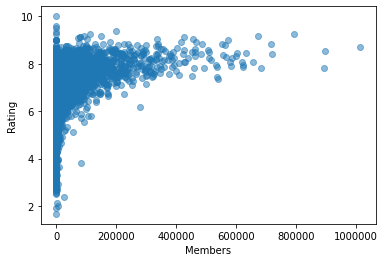

In [32]:
#Viewing the relationship between the rating and the members of the anime society
plt.scatter(data_df['Members'], data_df['Rating'], alpha=0.5)
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.xlabel('Members')
plt.ylabel('Rating')
plt.show()

It seems from the above graph that the ratings collected for the dataset are not dependent on the number of community members in its society as we can see animes with 0 members have ratings ranging from 0-10.

Since our data is mainly focused on the ratings and since the members of community are not related to rating of a particular anime, thus, we will clean our data by removing all those animes with No ratings only.

In [33]:
#Removing animes with NaN ratings
data_df.dropna(subset=['Rating'], inplace=True)

In [34]:
#Viewing the new number of dataset values
len(data_df.index)

12064

## Computing relationships between Type of Anime and Rating
Lets view whether the rating of an anime depends on the type of anime series it is (whether it is a Movie, TV series, OVA, etc.)

[]

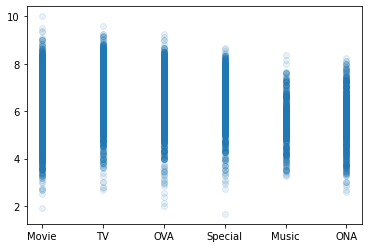

In [35]:
#Viewing the relationship between ratings and type of anime
plt.scatter(data_df['Type'], data_df['Rating'], alpha=0.1)
plt.plot()

The above graph shows that the Anime Movies and Series make up for the most number of ratings, followed closely by OVAs, Specials and ONAs whereas Musics are not that much of a great factor in Anime ratings

## Computing the relationship between Genre of Anime and Rating
Lets view whether a particular genre of anime affects its rating i.e. which genre is more preffered by the audience

### Using Average Distribtion to Divide Ratings between Genre
A particular anime does not have only one genre but rather more than one. A good way of finding the particular genre with the most ratings would be to divide the rating of that anime by the number of genres it has and then allocating each obtained rating to each of the genre for that anime

In [37]:
# Lets try the above method on a single example first
some_anime = data_df.iloc[12] 
some_anime

Name                                                  Gintama
Genre       Action, Comedy, Historical, Parody, Samurai, S...
Type                                                       TV
Episodes                                                  201
Rating                                                   9.04
Members                                                336376
Name: 12, dtype: object

In [91]:
#Dividing the rating among each of its genre
anime_rating = some_anime.Rating
anime_genres = [x.strip(' ') for x in some_anime.Genre.split(',')]
rating_per_genre = round(anime_rating / len(anime_genres) , 3)
genre_dict =  {(anime_genres[i], rating_per_genre) for i in range(len(anime_genres))}
genre_dict

{('Action', 1.291),
 ('Comedy', 1.291),
 ('Historical', 1.291),
 ('Parody', 1.291),
 ('Samurai', 1.291),
 ('Sci-Fi', 1.291),
 ('Shounen', 1.291)}

In [101]:
#Computing the division ratio for all the animes
genre_dict = dict()
for x,y in zip(data_df.Genre, data_df.Rating):
  if isinstance(x, str):
    anime_genres = [s.strip(' ') for s in x.split(',')]
    rating_per_anime = round(y / len(anime_genres), 3)
    for i in range(len(anime_genres)):
      if anime_genres[i] not in genre_dict.keys():
        genre_dict.update({anime_genres[i]: rating_per_genre})
      else:
        genre_dict[anime_genres[i]] += rating_per_genre

genre_dict

{'Action': 3573.4880000001704,
 'Adventure': 2989.9560000000947,
 'Cars': 92.95199999999986,
 'Comedy': 5906.325000000473,
 'Dementia': 307.25799999999936,
 'Demons': 370.5169999999992,
 'Drama': 2552.307000000038,
 'Ecchi': 810.7480000000113,
 'Fantasy': 2894.4220000000823,
 'Game': 228.50699999999952,
 'Harem': 404.0829999999991,
 'Hentai': 1462.7029999999997,
 'Historical': 1030.2180000000199,
 'Horror': 467.34199999999896,
 'Josei': 67.13199999999992,
 'Kids': 2063.0179999999746,
 'Magic': 964.3770000000177,
 'Martial Arts': 340.8239999999993,
 'Mecha': 1199.339000000012,
 'Military': 537.0559999999999,
 'Music': 1087.0220000000172,
 'Mystery': 626.1350000000036,
 'Parody': 520.2729999999992,
 'Police': 251.74499999999946,
 'Psychological': 291.7659999999994,
 'Romance': 1855.1669999999815,
 'Samurai': 188.48599999999962,
 'School': 1518.2159999999972,
 'Sci-Fi': 2628.476000000048,
 'Seinen': 686.8120000000062,
 'Shoujo': 766.8540000000095,
 'Shoujo Ai': 69.71399999999991,
 'Shoune

In [105]:
#View the top 10 genres with the most ratings
sorted(genre_dict, key=genre_dict.get, reverse=True)[:10]

['Comedy',
 'Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'Drama',
 'Shounen',
 'Kids',
 'Romance',
 'Slice of Life']

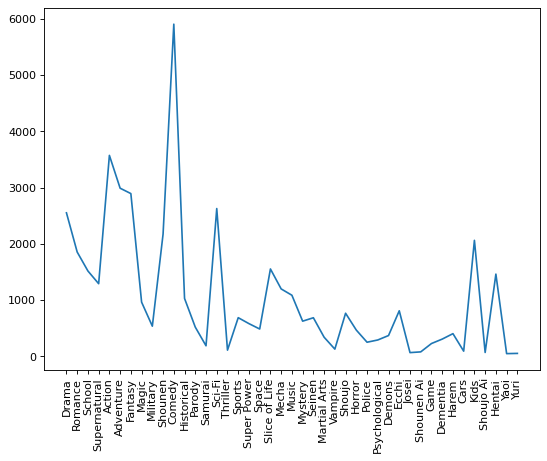

In [119]:
#Viewing the realtion between the genres and their respective ratings using a graph
genre_df = pd.Series(genre_dict)
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(genre_df.index, genre_df.values)
plt.xticks(rotation=90, fontsize=10)
plt.show()

In [ ]:
#Computing the total genres provided in the list
genre_list = list(set(x for sublist in ([x.split(',') for x in list((data_df['Genre'].value_counts().index))]) for x in sublist))
genre_list = [x.strip(' ') for x in genre_list]
len(genre_list)